<a id='TOC'></a>
# Project: *Analysis of Future of Buffalo Breeds and Milk Production growth in India*

`
By   : Shahapurkar, Gangaprasad
Email: garashah@iu.edu`

<img src="../images/cover_photo.jpg" alt="Cover photo" style="width:=500px;height:=300px;"/>

## Abstract and objective


Water buffalo (**Bubalus bubalis**) is also called *Domestic Water Buffalo* or *Asian Water Buffalo*. It is large bovid originating in Indian subcontinent, Southeast Asia, and China and today found in other regions of world - Europe, Australia, North America, South America and some African countries. There are two extant types recognized based on morphological and behavioural criteria:

1. River Buffalo - Mostly found in Indian subcontinent and further west to the Balkans, Egypt, and Italy
2. Swamp Buffalo - Found from west of Assam through Southeast Asia to the Yangtze valley of China in the east

India is the largest milk producer and consumer compared to other countries in the world, and stands unique in terms of the largest share of milk being produced coming from buffaloes. The aim of this academic project is to study the livestock census data of buffalo breeds in India and their milk production using Empirical Benchmarking analysis method at state level. Looking at the small sample of data, our analysis indicates that we have been seeing increasing trends in past few years in livestock and milk production but there are considerable opportunities to increase production using combined interventions.

## Data files overview 

**1. India Buffalo Data**: Main dataset that contains buffalo breed information of each state in India, Milk production, In-Milk animals, yield per In-Milk animals. Past 6 year data points are represented in data file.

**2. India Demographic Data**: Supplimentary dataset which represents number of villages, districts of each state. Projected population of year 2020 of each state. Agricultural zone category of each state.

## Import libraries

In [2]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from time import time
import os

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import SelectKBest

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer

from sklearn.decomposition import PCA

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

warnings.simplefilter('ignore') #Suppress all the inline warnings

## Global Configurations

In [3]:
sns.set_style('whitegrid') # Set the color theme for plots
%matplotlib inline 

## Common functions

In [4]:
'''
Function to load data file in pandas 
dataframe and print shape and information 
of dataframe

Input: Path of file and name of file without extension
Output: Pandas dataframe
'''
def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    print("\n")
    print(df.info())
    print("\n")
    display(df.head(5))
    return df

In [5]:
!python --version #check the version of python installed 

Python 3.7.4


In [ ]:
!pip install tabulate # need to install tabulate for printing tables in markdown format

## Import Data

In [6]:
DATA_DIR = "../data/"               # set data file directory  
buff_data_file_name = "india_buffalo_data" # Main Buffalo data file name
demo_data_file_name = "india_demographics_data" # India demographic data file name

In [7]:
# Display list of files in data directory
!ls -l $DATA_DIR 

total 16
-rwxrwx---+ 1 User User 8814 Nov 28 20:14 india_buffalo_data.csv
-rwxrwx---+ 1 User User 2708 Nov 29 22:00 india_demographics_data.csv


### Main Buffalo Dataset 
This dataset contains 50 features and 36 rows. Each row represents data for one state of country. Notice that we see all the columns of datatype Integer or Float and only column is character which is state name 

In [8]:
# Load the main data set which contains buffalo information
buffalo_df = load_data(os.path.join(DATA_DIR, f'{buff_data_file_name}.csv'), buff_data_file_name)

india_buffalo_data: shape is (36, 50)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 50 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State_name                 36 non-null     object 
 1   Banni_male_total           36 non-null     int64  
 2   Banni_female_total         36 non-null     int64  
 3   Bhadawari_male_total       36 non-null     int64  
 4   Bhadawari_female_total     36 non-null     int64  
 5   Chilika_male_total         36 non-null     int64  
 6   Chilika_female_total       36 non-null     int64  
 7   Jaffarabadi_male_total     36 non-null     int64  
 8   Jaffarabadi_female_total   36 non-null     int64  
 9   Kalahandi_male_total       36 non-null     int64  
 10  Kalahandi_female_total     36 non-null     int64  
 11  Marathwadi_male_total      36 non-null     int64  
 12  Marathwadi_female_total    36 non-null     int64  
 13  Mehsana_male

,State_name,Banni_male_total,Banni_female_total,Bhadawari_male_total,Bhadawari_female_total,Chilika_male_total,Chilika_female_total,Jaffarabadi_male_total,Jaffarabadi_female_total,Kalahandi_male_total,...,201516_yield_in_milk,201617_yield_in_milk,201718_yield_in_milk,201819_yield_in_milk,201314_milk_production,201415_milk_production,201516_milk_production,201617_milk_production,201718_milk_production,201819_milk_production
0,ANDAMAN & NICOBAR ISLANDS,0,0,0,0,0,0,0,0,0,...,3.83,3.63,3.64,3.84,1.80,1.72,1.09,1.51,1.55,1.97
1,ANDHRA PRADESH,0,0,0,0,0,0,1748,13313,0,...,5.52,5.65,7.34,7.52,9207.05,6573.96,7444.83,8308.18,9100.76,9932.01
2,ARUNACHAL PRADESH,0,0,0,0,0,0,0,0,0,...,2.61,2.55,2.54,2.55,NaN,0.10,0.40,0.44,0.53,0.70
3,ASSAM,0,0,0,0,0,0,0,0,0,...,3.33,3.64,3.43,3.43,122.13,119.93,116.90,114.89,115.44,117.13
4,BIHAR,0,0,2969,24121,0,0,3382,24984,0,...,4.27,4.30,4.38,4.39,3014.94,3248.01,3209.69,3358.03,3619.42,3850.61


### Secondary Dataset - Demographics data
This dataset has 20 features and 36 rows. Each row represents data for one state of country. All the columns of this dataset are Integer and one column is character which is state name

In [9]:
# Load the secondary data set which contains demographics information
demographic_df = load_data(os.path.join(DATA_DIR, f'{demo_data_file_name}.csv'), demo_data_file_name)

india_demographics_data: shape is (36, 20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   State_name            36 non-null     object
 1   district_count        36 non-null     int64 
 2   village_count         36 non-null     int64 
 3   official_area_sqkm    36 non-null     int64 
 4   proj_population_2020  36 non-null     int64 
 5   agro_climatic_zone1   36 non-null     int64 
 6   agro_climatic_zone2   36 non-null     int64 
 7   agro_climatic_zone3   36 non-null     int64 
 8   agro_climatic_zone4   36 non-null     int64 
 9   agro_climatic_zone5   36 non-null     int64 
 10  agro_climatic_zone6   36 non-null     int64 
 11  agro_climatic_zone7   36 non-null     int64 
 12  agro_climatic_zone8   36 non-null     int64 
 13  agro_climatic_zone9   36 non-null     int64 
 14  agro_climatic_zone10  36 non-null     int64 
 1

,State_name,district_count,village_count,official_area_sqkm,proj_population_2020,agro_climatic_zone1,agro_climatic_zone2,agro_climatic_zone3,agro_climatic_zone4,agro_climatic_zone5,agro_climatic_zone6,agro_climatic_zone7,agro_climatic_zone8,agro_climatic_zone9,agro_climatic_zone10,agro_climatic_zone11,agro_climatic_zone12,agro_climatic_zone13,agro_climatic_zone14,agro_climatic_zone15
0,ANDAMAN & NICOBAR ISLANDS,3,552,8249,417036,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,ANDHRA PRADESH,13,17973,162223,53903393,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0
2,ARUNACHAL PRADESH,25,5577,87157,1570458,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,ASSAM,33,28679,79255,35607039,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,BIHAR,38,45172,94945,124799926,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


<a id=EDA></a>
## EDA
[Return to start](#TOC)

The goal of this section is to get familiar with the data that will be used for the end to end pipeline. It is very important to explore the data and summarize its main characteristics before diving in the machine learning models. It is also interesting to see how the different features are correlated with the target feature

In [10]:
pd.set_option('display.float_format', lambda x: f'{x:,.2f}') # Set rounding option for float numbers

In [11]:
buffalo_df.describe() # Fetch statistical information of buffalo dataset 

,Banni_male_total,Banni_female_total,Bhadawari_male_total,Bhadawari_female_total,Chilika_male_total,Chilika_female_total,Jaffarabadi_male_total,Jaffarabadi_female_total,Kalahandi_male_total,Kalahandi_female_total,...,201516_yield_in_milk,201617_yield_in_milk,201718_yield_in_milk,201819_yield_in_milk,201314_milk_production,201415_milk_production,201516_milk_production,201617_milk_production,201718_milk_production,201819_milk_production
count,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,...,36.00,34.00,34.00,34.00,31.00,35.00,34.00,33.00,33.00,33.00
mean,"1,010.97","9,603.53","7,889.83","40,826.47",26.92,67.14,"3,827.67","45,380.61","1,928.50","2,016.36",...,3.98,4.20,4.29,4.44,"2,272.30","2,134.53","2,248.74","2,462.55","2,613.92","2,791.36"
std,"6,065.83","57,621.17","43,553.42","220,015.56",161.50,402.83,"14,390.31","221,652.23","11,571.00","12,098.17",...,1.98,1.95,2.13,2.24,"3,837.47","3,751.34","3,841.61","4,145.15","4,399.50","4,683.84"
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.19,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,3.24,3.41,3.32,3.35,19.22,2.89,7.30,6.29,5.80,5.62
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,4.19,4.30,4.42,4.46,286.61,233.45,281.43,337.60,355.16,372.03
75%,0.00,0.00,0.00,0.00,0.00,0.00,132.75,321.00,0.00,0.00,...,5.08,5.17,5.07,5.17,"3,418.68","3,135.24","3,186.80","3,358.03","3,619.42","3,850.61"
max,"36,395.00","345,727.00","261,685.00","1,322,035.00",969.00,"2,417.00","82,521.00","1,329,863.00","69,426.00","72,589.00",...,8.21,8.39,8.77,9.26,"16,804.50","17,523.93","16,864.51","17,691.89","18,517.16","19,462.98"


In [12]:
demographic_df.describe() #Fetch statistical information about demographic dataset

,district_count,village_count,official_area_sqkm,proj_population_2020,agro_climatic_zone1,agro_climatic_zone2,agro_climatic_zone3,agro_climatic_zone4,agro_climatic_zone5,agro_climatic_zone6,agro_climatic_zone7,agro_climatic_zone8,agro_climatic_zone9,agro_climatic_zone10,agro_climatic_zone11,agro_climatic_zone12,agro_climatic_zone13,agro_climatic_zone14,agro_climatic_zone15
count,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00
mean,20.56,"18,428.64","88,119.86","38,102,418.11",0.08,0.22,0.03,0.08,0.03,0.11,0.14,0.11,0.11,0.14,0.11,0.17,0.11,0.03,0.06
std,16.24,"23,216.33","95,694.50","50,005,546.62",0.28,0.42,0.17,0.28,0.17,0.32,0.35,0.32,0.32,0.35,0.32,0.38,0.32,0.17,0.23
min,1.00,0.00,33.00,"73,183.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,10.25,765.75,"9,929.00","1,582,302.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,18.00,"9,443.50","54,697.00","23,457,807.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,30.75,"29,690.50","130,073.50","56,395,644.50",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,75.00,"108,910.00","341,876.00","237,882,725.00",1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### Identify missing values

In [13]:
# Check top 10 attributes with missing value count in buffalo dataset
percent = (buffalo_df.isnull().sum()/buffalo_df.isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = buffalo_df.isna().sum().sort_values(ascending = False)

buffalo_missing_data  = pd.concat([percent, sum_missing], axis=1, keys=["Missing %", "Missing Count"])
output = buffalo_missing_data.head(10)

# print dataframe output in markdown format 
print(output.to_markdown(headers=["Feature","Missing %","Missing Count"], tablefmt="grid")) 

+------------------------+-------------+-----------------+
| Feature                |   Missing % |   Missing Count |
+========================+=============+=================+
| 201314_milk_production |       13.89 |               5 |
+------------------------+-------------+-----------------+
| 201314_yield_in_milk   |       11.11 |               4 |
+------------------------+-------------+-----------------+
| 201314_in_milk         |       11.11 |               4 |
+------------------------+-------------+-----------------+
| 201819_milk_production |        8.33 |               3 |
+------------------------+-------------+-----------------+
| 201617_milk_production |        8.33 |               3 |
+------------------------+-------------+-----------------+
| 201718_milk_production |        8.33 |               3 |
+------------------------+-------------+-----------------+
| 201516_milk_production |        5.56 |               2 |
+------------------------+-------------+----------------

In [14]:
# Check top 10 attributes with missing value count in demographic dataset
percent = (demographic_df.isnull().sum()/demographic_df.isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = demographic_df.isna().sum().sort_values(ascending = False)

demographic_missing_data  = pd.concat([percent, sum_missing], axis=1, keys=["Missing %", "Missing Count"])
output = demographic_missing_data.head(10)

# print dataframe output in markdown format
print(output.to_markdown(headers=["Feature","Missing %","Missing Count"], tablefmt="grid"))  

+----------------------+-------------+-----------------+
| Feature              |   Missing % |   Missing Count |
+======================+=============+=================+
| agro_climatic_zone15 |           0 |               0 |
+----------------------+-------------+-----------------+
| agro_climatic_zone14 |           0 |               0 |
+----------------------+-------------+-----------------+
| district_count       |           0 |               0 |
+----------------------+-------------+-----------------+
| village_count        |           0 |               0 |
+----------------------+-------------+-----------------+
| official_area_sqkm   |           0 |               0 |
+----------------------+-------------+-----------------+
| proj_population_2020 |           0 |               0 |
+----------------------+-------------+-----------------+
| agro_climatic_zone1  |           0 |               0 |
+----------------------+-------------+-----------------+
| agro_climatic_zone2  |       

### Fill missing values

There are some missing values in main buffalo dataset but there are no mising values in the demograhic dataset. Since all the columns with missing vlaues are number columns we choose to fill them with 0 instead of mean or median method to avoid results.  0 would indicated data was not recorded for this particular attribute. Let us leave the secondary dataset. No action needed on it. 

In [15]:
buffalo_df.fillna(value=0, inplace=True) # Fill 0 value inplace in buffalo dataset 

### Rest Index

Both the dataset has one record for each state. As state name is unique column in both the dataset so we set sate name as index column and drop it from the column list

In [16]:
buffalo_df.set_index(["State_name"], drop=True, inplace=True)
demographic_df.set_index(["State_name"], drop=True, inplace=True)

### Data Distribution

Focus of this section would be to identify buffalo distribution in country. We  by buffalo count 

In [17]:
top_df = buffalo_df[["total_buffalo","total_male","total_female"]] # select only subset of data 
top_df.reset_index(inplace=True)
top_df.columns = ["State","Total","Male","Female"] # rename columns to readable format
top_df.sort_values(by="Total", axis=0, ascending=False, inplace=True) #sort data to select top 10 records
top_df = top_df.iloc[:10]
top_df = top_df[["State","Male","Female"]]
print(top_df.to_markdown(tablefmt="grid")) # print dataframe output in markdown format

+----+----------------+---------+----------+
|    | State          |    Male |   Female |
+====+================+=========+==========+
| 32 | UTTAR PRADESH  | 4914705 | 25710629 |
+----+----------------+---------+----------+
| 28 | RAJASTHAN      | 1575276 | 11400819 |
+----+----------------+---------+----------+
|  1 | ANDHRA PRADESH | 1350533 |  9272257 |
+----+----------------+---------+----------+
| 10 | GUJARAT        |  835775 |  9549799 |
+----+----------------+---------+----------+
| 18 | MADHYA PRADESH | 1283620 |  6904369 |
+----+----------------+---------+----------+
|  4 | BIHAR          |  976436 |  6590797 |
+----+----------------+---------+----------+
| 11 | HARYANA        |  937883 |  5147429 |
+----+----------------+---------+----------+
| 19 | MAHARASHTRA    |  596689 |  4997703 |
+----+----------------+---------+----------+
| 27 | PUNJAB         |  533701 |  4626033 |
+----+----------------+---------+----------+
| 15 | KARNATAKA      |  360374 |  3110131 |
+----+----

In [18]:
top_transformed = top_df.reset_index().melt(['State', 'index'])
top_transformed.columns = ["State","index","Legend","value"] # rename columns to readable format
output = top_transformed.head()
print(output.to_markdown(tablefmt="grid")) # print dataframe output in markdown format

+----+----------------+---------+----------+---------+
|    | State          |   index | Legend   |   value |
+====+================+=========+==========+=========+
|  0 | UTTAR PRADESH  |      32 | Male     | 4914705 |
+----+----------------+---------+----------+---------+
|  1 | RAJASTHAN      |      28 | Male     | 1575276 |
+----+----------------+---------+----------+---------+
|  2 | ANDHRA PRADESH |       1 | Male     | 1350533 |
+----+----------------+---------+----------+---------+
|  3 | GUJARAT        |      10 | Male     |  835775 |
+----+----------------+---------+----------+---------+
|  4 | MADHYA PRADESH |      18 | Male     | 1283620 |
+----+----------------+---------+----------+---------+


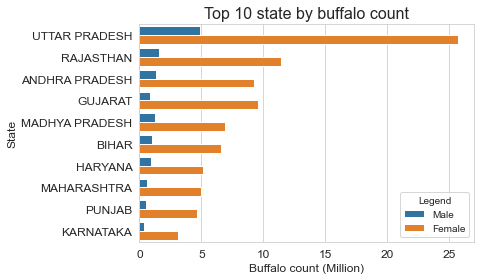

In [19]:
sns.barplot(top_transformed.value / 1000000 ,y="State", hue="Legend", data=top_transformed, )
plt.title('Top 10 state by buffalo count', fontsize=16)
plt.xlabel('Buffalo count (Million)', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.yticks(fontsize=12) 
plt.xticks(fontsize=12) 
plt.show()

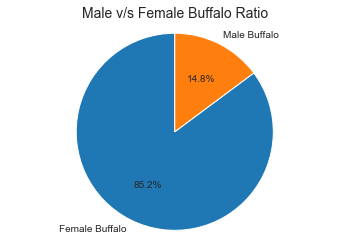

In [20]:
labels = ['Female Buffalo', 'Male Buffalo']
sizes = [np.sum(buffalo_df.total_female), np.sum(buffalo_df.total_male)]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',startangle=90)
ax1.axis('equal')
plt.title('Male v/s Female Buffalo Ratio', fontsize=14)
plt.show()

<a id=FeatureEng></a>
## Feature Engineering 
[Return to start](#TOC)

When conducting an end to end Machine Learning project, after exploring and preprocessing the data it is essential to think of feature engineering. It consists of creating new feature(s) based on the features that already exist in the dataset that can be useful for training the model.

### New Features

Calculate total number of buffalos under each category

In [21]:
buffalo_df["Banni"] = buffalo_df["Banni_male_total"] + buffalo_df["Banni_female_total"]
buffalo_df["Bhadawari"] = buffalo_df["Bhadawari_male_total"] + buffalo_df["Bhadawari_female_total"]
buffalo_df["Chilika"] = buffalo_df["Chilika_male_total"] + buffalo_df["Chilika_female_total"]
buffalo_df["Jaffarabadi"] = buffalo_df["Jaffarabadi_male_total"] + buffalo_df["Jaffarabadi_female_total"]
buffalo_df["Kalahandi"] = buffalo_df["Kalahandi_male_total"] + buffalo_df["Kalahandi_female_total"]
buffalo_df["Marathwadi"] = buffalo_df["Marathwadi_male_total"] + buffalo_df["Marathwadi_female_total"]
buffalo_df["Mehsana"] = buffalo_df["Mehsana_male_total"] + buffalo_df["Mehsana_female_total"]
buffalo_df["Murrah"] = buffalo_df["Murrah_male_total"] + buffalo_df["Murrah_female_total"]
buffalo_df["Nagpuri"] = buffalo_df["Nagpuri_male_total"] + buffalo_df["Nagpuri_female_total"]
buffalo_df["Nili Ravi"] = buffalo_df["Nili_Ravi_male_total"] + buffalo_df["Nili_Ravi_female_total"]
buffalo_df["Non Descript"] = buffalo_df["Non_descript_male_total"] + buffalo_df["Non_descript_female_total"]
buffalo_df["Pandharpuri"] = buffalo_df["Pandharpuri_male_total"] + buffalo_df["Pandharpuri_female_total"]
buffalo_df["Surti"] = buffalo_df["Surti_male_total"] + buffalo_df["Surti_female_total"]
buffalo_df["Toda"] = buffalo_df["Toda_male_total"] + buffalo_df["Toda_female_total"]

In [22]:
count_df = buffalo_df[["total_buffalo","Banni","Bhadawari","Chilika","Jaffarabadi","Kalahandi","Marathwadi","Mehsana",
                       "Murrah","Nagpuri","Nili Ravi","Non Descript","Pandharpuri","Surti","Toda","total_male",
                      "total_female"]]
count_df.sort_values(by="total_buffalo", axis=0, ascending=False, inplace=True)
count_df.head()

,total_buffalo,Banni,Bhadawari,Chilika,Jaffarabadi,Kalahandi,Marathwadi,Mehsana,Murrah,Nagpuri,Nili Ravi,Non Descript,Pandharpuri,Surti,Toda,total_male,total_female
State_name,,,,,,,,,,,,,,,,,
UTTAR PRADESH,30625334,0,1583720,0,130767,0,0,11444,20110852,0,12519,8772357,0,2508,0,4914705,25710629
RAJASTHAN,12976095,0,2610,0,20230,0,0,0,6448563,0,0,5612634,0,892058,0,1575276,11400819
ANDHRA PRADESH,10622790,0,0,0,15061,0,0,5219,5227270,13521,0,5361719,0,0,0,1350533,9272257
GUJARAT,10385574,382122,0,0,1412384,0,0,3545647,0,0,0,3215549,0,1829872,0,835775,9549799
MADHYA PRADESH,8187989,0,81983,0,38735,0,0,0,1446078,20959,0,6600234,0,0,0,1283620,6904369


In [23]:
output = count_df[["Banni","Bhadawari","Chilika","Jaffarabadi","Kalahandi","Marathwadi","Mehsana",
          "Murrah","Nagpuri","Nili Ravi","Non Descript","Pandharpuri","Surti","Toda"]].sum(axis=0)

# print dataframe output in markdown format
print(output.to_markdown(headers=["Breed","Count"], tablefmt="grid", floatfmt=(".0f"))) 

+--------------+----------+
| Breed        |    Count |
+==============+==========+
| Banni        |   382122 |
+--------------+----------+
| Bhadawari    |  1753787 |
+--------------+----------+
| Chilika      |     3386 |
+--------------+----------+
| Jaffarabadi  |  1771498 |
+--------------+----------+
| Kalahandi    |   142015 |
+--------------+----------+
| Marathwadi   |   376595 |
+--------------+----------+
| Mehsana      |  3625125 |
+--------------+----------+
| Murrah       | 48254874 |
+--------------+----------+
| Nagpuri      |   190994 |
+--------------+----------+
| Nili Ravi    |   658990 |
+--------------+----------+
| Non Descript | 47142313 |
+--------------+----------+
| Pandharpuri  |   483738 |
+--------------+----------+
| Surti        |  3892894 |
+--------------+----------+
| Toda         |     5536 |
+--------------+----------+


Calculate average of below fields of all past 6 years data points
- **Average in milk** - Average number of In-Milk animals per state (figures in 000 nos)
- **Average yield per In-Milk animal** - Average yield per In-Milk animals per state (figures in kg/day)
- **Average milk production** - Average milk production per state (figures in 000 tones)

In [24]:
buffalo_df["avg_in_milk"] = (buffalo_df["201314_in_milk"] + buffalo_df["201415_in_milk"] + buffalo_df["201516_in_milk"] + 
                             buffalo_df["201617_in_milk"] + buffalo_df["201718_in_milk"] + buffalo_df["201819_in_milk"])/6

buffalo_df["avg_yield_in_milk"] = (buffalo_df["201314_yield_in_milk"] + buffalo_df["201415_yield_in_milk"] + buffalo_df["201516_yield_in_milk"] + 
                                   buffalo_df["201617_yield_in_milk"] + buffalo_df["201718_yield_in_milk"] + buffalo_df["201819_yield_in_milk"])/6

buffalo_df["avg_milk_production"] = (buffalo_df["201314_milk_production"] + buffalo_df["201415_milk_production"] + buffalo_df["201516_milk_production"] + 
                                     buffalo_df["201617_milk_production"] + buffalo_df["201718_milk_production"] + buffalo_df["201819_milk_production"])/6

In [25]:
# Fill 0 value inplace in buffalo dataset after new features calculated 
buffalo_df.fillna(value=0, inplace=True) 

buffalo_df[["avg_in_milk","avg_yield_in_milk","avg_milk_production"]].head()

,avg_in_milk,avg_yield_in_milk,avg_milk_production
State_name,,,
ANDAMAN & NICOBAR ISLANDS,1.17,3.78,1.61
ANDHRA PRADESH,"3,838.80",6.14,"8,427.80"
ARUNACHAL PRADESH,0.44,1.82,0.36
ASSAM,98.39,3.30,117.74
BIHAR,"2,175.45",4.25,"3,383.45"


### Correlation with Total Buffalo count

In [26]:
cols = ["Banni","Bhadawari","Chilika","Jaffarabadi","Kalahandi","Marathwadi","Mehsana",
        "Murrah","Nagpuri","Nili Ravi","Non Descript","Pandharpuri","Surti","Toda",
        "avg_in_milk","avg_yield_in_milk","avg_milk_production", "total_buffalo"]
corr = buffalo_df[cols].corr()

In [27]:
print("Most Positive Correlations:")
output = corr['total_buffalo'].sort_values(ascending=False).head(5)
print(output.to_markdown(headers=["Feature","%"], tablefmt="grid", floatfmt=(".2f")))

print("\nMost Negative Correlations:")
output = corr['total_buffalo'].sort_values(ascending=False).tail(5)
print(output.to_markdown(headers=["Feature","%"], tablefmt="grid", floatfmt=(".2f")))

Most Positive Correlations:
+---------------------+------+
| Feature             |    % |
+=====================+======+
| total_buffalo       | 1.00 |
+---------------------+------+
| avg_in_milk         | 0.99 |
+---------------------+------+
| avg_milk_production | 0.95 |
+---------------------+------+
| Murrah              | 0.93 |
+---------------------+------+
| Non Descript        | 0.90 |
+---------------------+------+

Most Negative Correlations:
+-------------+-------+
| Feature     |     % |
+=============+=======+
| Pandharpuri |  0.07 |
+-------------+-------+
| Marathwadi  |  0.07 |
+-------------+-------+
| Toda        | -0.07 |
+-------------+-------+
| Chilika     | -0.07 |
+-------------+-------+
| Kalahandi   | -0.07 |
+-------------+-------+


### Correlation Observations

Total Buffalo count is not our target feature but it would be interesting to see how the different features are correlated with this feature. 

- Non Descript, Murrah, Average in-milk, Average milk production are highly positve correlated features with total buffalo count. Though Murrah and Non Descript are the only features are actual buffalo breeds and directly impact to total buffalo count but, average in-milk feature takes into consideration total number of in-milk animals and average milk production would be indirect feature.

- Toda , Chilika and Kalahandi are the most highly negative correlated features with total buffalo breeds.

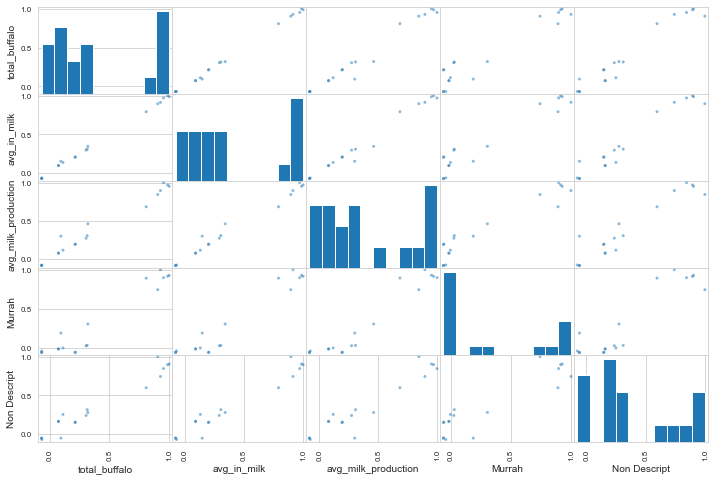

In [28]:
attributes = ["total_buffalo","avg_in_milk","avg_milk_production","Murrah","Non Descript"]
scatter_matrix(corr[attributes], figsize=(12, 8));

### Buffalo breed analysis of state _**Uttar Pradesh**_ and _**Punjab**_

- **Uttar Pradesh** state is the top most state in _**milk production**_ and total number of buffalo breeds in India. This state has highest number of Murrah **(known worldwide for high yield)**, Non Descript and Bhadawari buffalo breeds.


- **Punjab** is not top milk producing state stands top in the list of _**Average Yield per In-Milk Animal**_. This is becuase ratio of Murrah buffalo breeds which are known for high yield are more compared to Uttar Pradesh

In [29]:
milk_df = buffalo_df[["total_buffalo","Murrah","avg_milk_production", "avg_yield_in_milk"]]

In [30]:
milk_df.sort_values(by="avg_milk_production", axis=0, ascending=False, inplace=True)
output = milk_df.head()
print("Top 5 average milk production state")
print(output.to_markdown(headers=["State","Buffalo Count","Murrah Count","Avg milk production","Avg yield per in-milk"], 
                         tablefmt="grid", floatfmt=(".2f")))

Top 5 average milk production state
+----------------+-----------------+----------------+-----------------------+-------------------------+
| State          |   Buffalo Count |   Murrah Count |   Avg milk production |   Avg yield per in-milk |
+================+=================+================+=======================+=========================+
| UTTAR PRADESH  |     30625334.00 |    20110852.00 |              17810.83 |                    4.45 |
+----------------+-----------------+----------------+-----------------------+-------------------------+
| RAJASTHAN      |     12976095.00 |     6448563.00 |              10379.76 |                    6.21 |
+----------------+-----------------+----------------+-----------------------+-------------------------+
| ANDHRA PRADESH |     10622790.00 |     5227270.00 |               8427.80 |                    6.14 |
+----------------+-----------------+----------------+-----------------------+-------------------------+
| PUNJAB         |      5159

In [31]:
milk_df.sort_values(by="avg_yield_in_milk", axis=0, ascending=False, inplace=True)
output = milk_df.head()
print("Top 5 average yield in-milk state")
print(output.to_markdown(headers=["State","Buffalo Count","Murrah Count","Avg milk production","Avg yield per in-milk"], 
                         tablefmt="grid", floatfmt=(".2f")))

Top 5 average yield in-milk state
+----------------+-----------------+----------------+-----------------------+-------------------------+
| State          |   Buffalo Count |   Murrah Count |   Avg milk production |   Avg yield per in-milk |
+================+=================+================+=======================+=========================+
| PUNJAB         |      5159734.00 |     4116508.00 |               7927.94 |                    8.39 |
+----------------+-----------------+----------------+-----------------------+-------------------------+
| HARYANA        |      6085312.00 |     5011145.00 |               7266.46 |                    8.30 |
+----------------+-----------------+----------------+-----------------------+-------------------------+
| CHANDIGARH     |        14034.00 |        8522.00 |                 27.22 |                    7.38 |
+----------------+-----------------+----------------+-----------------------+-------------------------+
| RAJASTHAN      |     1297609

This brings interesting point to check Top breeds in these two states.

In [32]:
breed_name_list = ["Banni","Bhadawari","Chilika","Jaffarabadi","Kalahandi","Marathwadi","Mehsana",
              "Murrah","Nagpuri","Nili Ravi","Non Descript","Pandharpuri","Surti","Toda"]

In [33]:
# Filter data for Uttar Pradesh state and Buffalo breeds
top_state_df = buffalo_df.loc[buffalo_df.index == "UTTAR PRADESH"][breed_name_list]
top_state_df.reset_index(drop=True, inplace=True)

temp_df = top_state_df.reset_index().melt() # Transpose data from row to column
temp_df.columns = ["Breed","Count"] # Change column name for readability 
temp_df.sort_values(by="Count", axis=0, ascending=False, inplace=True) # Sort data by breed count

# Display Top 3 records
output = temp_df[:3]
print(output.to_markdown(tablefmt="grid"))

+----+--------------+----------+
|    | Breed        |    Count |
+====+==============+==========+
|  8 | Murrah       | 20110852 |
+----+--------------+----------+
| 11 | Non Descript |  8772357 |
+----+--------------+----------+
|  2 | Bhadawari    |  1583720 |
+----+--------------+----------+


In [34]:
# capture labels and values for plotting
label_1 = list(output.Breed.values)
sizes_1 = list(output.Count.values)

In [35]:
top_state_df = buffalo_df.loc[buffalo_df.index == "PUNJAB"][breed_name_list]
top_state_df.reset_index(drop=True, inplace=True)

temp_df = top_state_df.reset_index().melt() # Transpose data from row to column
temp_df.columns = ["Breed","Count"] # Change column name for readability 
temp_df.sort_values(by="Count", axis=0, ascending=False, inplace=True) # Sort data by breed count

# Display Top 3 records
output = temp_df[:3]
print(output.to_markdown(tablefmt="grid"))

+----+--------------+---------+
|    | Breed        |   Count |
+====+==============+=========+
|  8 | Murrah       | 4116508 |
+----+--------------+---------+
| 11 | Non Descript |  523218 |
+----+--------------+---------+
| 10 | Nili Ravi    |  485940 |
+----+--------------+---------+


In [36]:
# capture labels and values for plotting
label_2 = list(output.Breed.values)
sizes_2 = list(output.Count.values)

Let us plot the data of two states side by side to get a visual picture of distribution of buffalo breeds

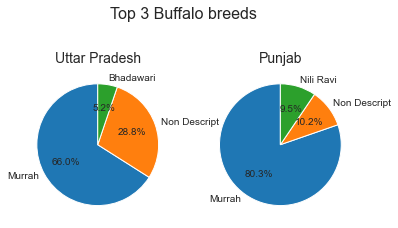

In [37]:
fig, (ax0,ax1) = plt.subplots(1, 2)
fig.suptitle('Top 3 Buffalo breeds', fontsize=16)
ax0.set_title('Uttar Pradesh', fontsize=14)
ax1.set_title('Punjab', fontsize=14)
ax0.pie(sizes_1, labels=label_1, autopct='%1.1f%%',startangle=90)
ax1.pie(sizes_2, labels=label_2, autopct='%1.1f%%',startangle=90)
plt.show()

<a id=Modeling></a>
## Modelling
[Return to start](#TOC)

Now that we have explored the data, cleaned it, preprocessed it and added a new feature to it, we can start the modelling part of the project by applying algorithms.

### Merge Dataset

In [38]:
# Merge main and demograhic dataset
data = buffalo_df.merge(demographic_df, how='left', on='State_name')
data.reset_index(inplace=True)
data.shape

(36, 86)

### Define features and labels

Since this dataset is a small and it is not labelled dataset, we would be considering our calculated field **avg milk production** as target variable and do co-variate analysis with demographic features 

In [57]:
# Define Features and labels
final_data = data.copy()

label = final_data['avg_milk_production']
features = final_data.drop(['State_name'], axis=1)

### Extract numerical and categorical features

This dataset contains all numerical features. Only state name could be called as categorical feature hence we will ignore this field 

In [40]:
#Setup attributes for pipeline
num_attribs = data.select_dtypes(exclude='object').columns
cat_attribs = data.select_dtypes(include='object').columns

In [41]:
cat_attribs

Index(['State_name'], dtype='object')

In [42]:
num_attribs

Index(['Banni_male_total', 'Banni_female_total', 'Bhadawari_male_total',
       'Bhadawari_female_total', 'Chilika_male_total', 'Chilika_female_total',
       'Jaffarabadi_male_total', 'Jaffarabadi_female_total',
       'Kalahandi_male_total', 'Kalahandi_female_total',
       'Marathwadi_male_total', 'Marathwadi_female_total',
       'Mehsana_male_total', 'Mehsana_female_total', 'Murrah_male_total',
       'Murrah_female_total', 'Nagpuri_male_total', 'Nagpuri_female_total',
       'Nili_Ravi_male_total', 'Nili_Ravi_female_total',
       'Non_descript_male_total', 'Non_descript_female_total',
       'Pandharpuri_male_total', 'Pandharpuri_female_total',
       'Surti_male_total', 'Surti_female_total', 'Toda_male_total',
       'Toda_female_total', 'total_male', 'total_female', 'total_buffalo',
       '201314_in_milk', '201415_in_milk', '201516_in_milk', '201617_in_milk',
       '201718_in_milk', '201819_in_milk', '201314_yield_in_milk',
       '201415_yield_in_milk', '201516_yield_in_mil

### Normalize Data

Since the feature of the dataset are of different scale we would need to normalize the data before using it further

In [43]:
dfNumCols = data[num_attribs]

In [44]:
num_encode = Normalizer().fit(dfNumCols)

df_num_cols = pd.DataFrame(
    num_encode.transform(dfNumCols), index=dfNumCols.index, 
    columns=list(num_attribs)
)
df_num_cols.describe()

,Banni_male_total,Banni_female_total,Bhadawari_male_total,Bhadawari_female_total,Chilika_male_total,Chilika_female_total,Jaffarabadi_male_total,Jaffarabadi_female_total,Kalahandi_male_total,Kalahandi_female_total,...,agro_climatic_zone6,agro_climatic_zone7,agro_climatic_zone8,agro_climatic_zone9,agro_climatic_zone10,agro_climatic_zone11,agro_climatic_zone12,agro_climatic_zone13,agro_climatic_zone14,agro_climatic_zone15
count,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,...,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00
mean,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
std,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.02,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### Empirical Benchmarking Model & Covariance analysis

There are two dominant approach of economic modelling to estimate the production behavior - **Empirical Benchmarking** and **Stochastic Frontier Analysis**. Empirical Benchmarking is simple modelling method, and it is one of the two dominant approach. This method was used to analyze past 6 years of data points available in the livestock dataset. In this approach milk production data of past 6 years was averaged. Top 10 states with most milk production reported were compared with average of the whole sample.

Covariance analysis was performed by with other demographics attributes  

In [67]:
model = data[["State_name","total_buffalo", "total_male", "total_female",
                       "avg_in_milk","avg_yield_in_milk","avg_milk_production","proj_population_2020"]]
model.sort_values(by="avg_milk_production", axis=0, ascending=False, inplace=True)
model_top10 = model[["State_name","avg_milk_production","proj_population_2020"]].head(10)

In [68]:
mean_avg_milk_production_sample = np.round(data.avg_milk_production.mean(), decimals=2)
print("Average Milk Production from Buffalos for whole sample         :", mean_avg_milk_production_sample)

Average Milk Production from Buffalos for whole sample         : 2227.99


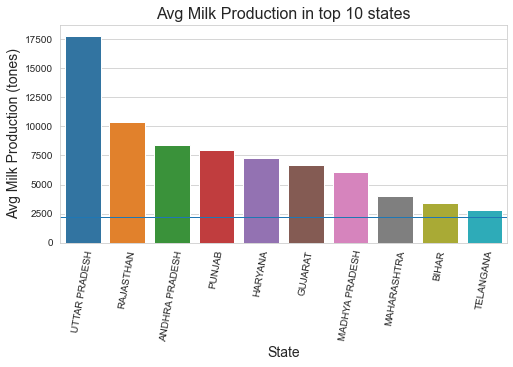

In [69]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(x=model_top10.State_name,y=model_top10.avg_milk_production, data=model_top10)
plt.axhline(y=mean_avg_milk_production_sample,linewidth=1)
plt.xticks(rotation=80)
plt.xlabel('State', fontsize=14)
plt.ylabel('Avg Milk Production (tones)', fontsize=14)
plt.title('Avg Milk Production in top 10 states', fontsize=16)
plt.show()

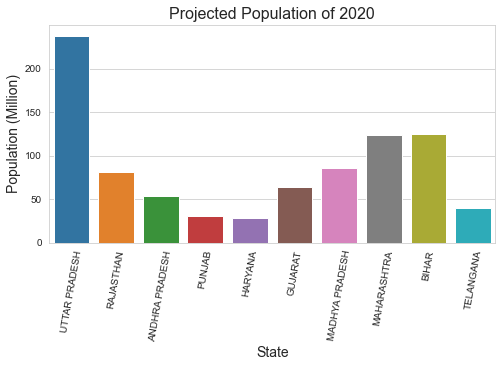

In [75]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(x=model_top10.State_name,y=model_top10.proj_population_2020/1000000, data=model_top10)
plt.xticks(rotation=80)
plt.xlabel('State', fontsize=14)
plt.ylabel('Population (Million)', fontsize=14)
plt.title('Projected Population of 2020', fontsize=16)
plt.show()

#### Covariance Analysis

In [49]:
demo_features = ['total_male', 'total_female','avg_in_milk', 'avg_yield_in_milk',
'avg_milk_production', 'district_count', 'village_count',
'official_area_sqkm', 'proj_population_2020', 'agro_climatic_zone1',
'agro_climatic_zone2', 'agro_climatic_zone3', 'agro_climatic_zone4',
'agro_climatic_zone5', 'agro_climatic_zone6', 'agro_climatic_zone7',
'agro_climatic_zone8', 'agro_climatic_zone9', 'agro_climatic_zone10',
'agro_climatic_zone11', 'agro_climatic_zone12', 'agro_climatic_zone13',
'agro_climatic_zone14', 'agro_climatic_zone15']

In [50]:
corr = df_num_cols[demo_features].corr()

print("Most Positive Correlations:")
output = corr['avg_milk_production'].sort_values(ascending=False).head(5)
print(output.to_markdown(headers=["Feature","%"], tablefmt="grid", floatfmt=(".2f")))

print("\nMost Negative Correlations:")
output = corr['avg_milk_production'].sort_values(ascending=False).tail(5)
print(output.to_markdown(headers=["Feature","%"], tablefmt="grid", floatfmt=(".2f")))

Most Positive Correlations:
+---------------------+------+
| Feature             |    % |
+=====================+======+
| avg_milk_production | 1.00 |
+---------------------+------+
| avg_in_milk         | 0.95 |
+---------------------+------+
| total_female        | 0.90 |
+---------------------+------+
| total_male          | 0.71 |
+---------------------+------+
| agro_climatic_zone6 | 0.50 |
+---------------------+------+

Most Negative Correlations:
+----------------------+-------+
| Feature              |     % |
+======================+=======+
| official_area_sqkm   | -0.17 |
+----------------------+-------+
| agro_climatic_zone2  | -0.19 |
+----------------------+-------+
| avg_yield_in_milk    | -0.23 |
+----------------------+-------+
| district_count       | -0.34 |
+----------------------+-------+
| proj_population_2020 | -0.94 |
+----------------------+-------+


In [51]:
model1 = df_num_cols[["avg_milk_production","avg_in_milk","total_female",
                      "agro_climatic_zone6","proj_population_2020"]].iloc[:10]
covMatrix = np.round(np.cov(model1,bias=True),3)

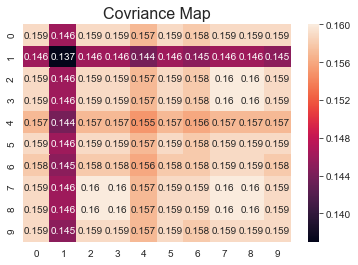

In [60]:
sns.heatmap(covMatrix, annot=True, fmt='g')
plt.title("Covriance Map", fontsize=16)
plt.show()

### Linear Regression Model

#### Custom Transformers

In [53]:
# Custom transformer to select columns from dataframe
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

#### Define Pipeline

In [54]:
# Define pipeline
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),        
        ('std_scaler', Normalizer())
    ])

In [55]:
# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()

# Linear Regression without parameters
linear = LinearRegression()

full_pipeline_with_predictor = Pipeline([
        ("preparation", num_pipeline),
        ("pca",pca),
        ("linear", linear)
    ])

# Parameters of pipelines:
param_grid = {
    'pca__n_components': [5, 15, 30, 45, 64]
}

In [63]:
# Apply GridSearch with predictors 
search = GridSearchCV(full_pipeline_with_predictor,param_grid, n_jobs=-1)
search.fit(features, label)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(features)

Best parameter (CV score=0.282):
{'pca__n_components': 5}


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

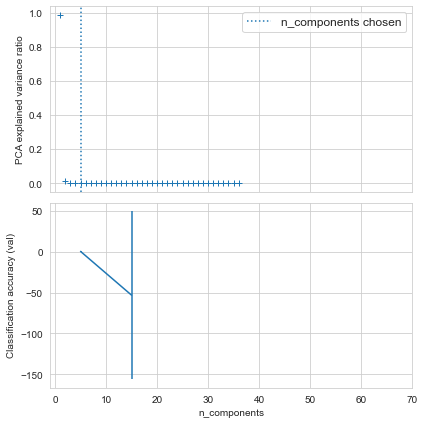

In [64]:
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components, linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)

components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(lambda g: g.nlargest(1, 'mean_test_score'))
best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 70)

plt.tight_layout()
plt.show()

<a id=Evaluate></a>
## Evaluation, reporting, analysis
[Return to start](#TOC)

**Empirical Benchmarking model** denotes that top 10 states are performing above average. There is possibility to increase the yield then the current attainable yield, evaluating the other socio-economic factors like agricultural data, population, climate factors etc. 

Correlation analysis done with other demographic features like population and climatic zones suggest that average growth is highly correlated with average in-milk animals, female buffaloes and climatic zone region which comes under **Zone 6: Trans-Gangetic Plains**.This factors would be highly contributing to average milk production growth

Due to absence of sufficient granular data analysis had to be done on state level rollup data. The sample linear regression modle attempted above did not yield satisfactory and meaningfull results. Based on the data trends it appears that it is possible to increase the production past current attenable numbers. However, this would need to combine different methods and multiple strategies.